### An incremental algorithm can find nice $k$-clusterings if allowed $2^k$ centers

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster


In [165]:
# unique nice clustering dataset
def unique_nice_clustered_data(k=4, dim=2, cluster_size=25, seed=42):
    np.random.seed(seed)
    data = np.zeros((cluster_size * k, dim))
    for k_i in range(1, k+1):
        center = np.array([np.random.uniform(10*k_i, 15*k_i) for i in range(dim)])
        # generate cluster_size points centered around center
        data[(k_i - 1) * cluster_size:k_i * cluster_size, :] = center + np.random.randn(cluster_size, dim)
    return data


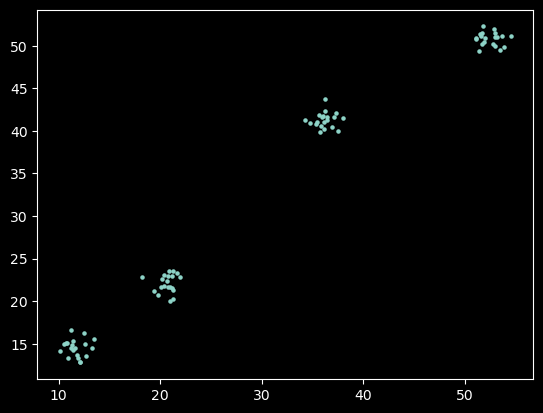

In [196]:
X = unique_nice_clustered_data(k=4, dim=2, cluster_size=20, seed=42)
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()


In [246]:
class DetectNiceClustering():
    def __init__(self, k):
        self.k = k

    def Candidates(self, S):
        # S is set of points in X
        # run single linkage on S to get a tree
        # assign each leaf node the corresponding data point
        # move bottom-up, assign each internal node the datapoint in one of its children
        # return all points at a depth < k from the root
        self.points = []
        S = np.array(S)
        Z = linkage(S, method='single', metric='euclidean')
        self.merges = Z[:, :2].astype(int)
        datasize = len(S)
        # list of internal nodes
        self.internal_assignment = [i for i in range(0, datasize)]
        for i in range(0, len(self.merges)):
            self.internal_assignment.append(self.internal_assignment[self.merges[i][0]])
        self.traverse(
            self.merges[-1][0],
            self.merges[-1][1],
            self.k - 1,
            datasize
        )
        return S[self.points]

    def traverse(self, p1, p2, k, datasize):
        if k == 1:
            # if k==1, add the children
            self.points.append(self.internal_assignment[p1])
            self.points.append(self.internal_assignment[p2])
            return
        if p1 < datasize:
            # if p1 is a leaf, add it
            self.points.append(self.internal_assignment[p1])
        else:
            # else, traverse the tree
            self.traverse(
                self.merges[p1-datasize][0],
                self.merges[p1-datasize][1],
                k - 1,
                datasize
            )
        if p2 < datasize:
            # if p2 is a leaf, add it
            self.points.append(self.internal_assignment[p2])
        else:
            # else, traverse the tree
            self.traverse(
                self.merges[p2-datasize][0],
                self.merges[p2-datasize][1],
                k - 1,
                datasize
            )

    def detect_niceness(self, X):
        self.T = []
        self.T.append([]) # T[0] is empty
        datasize = len(X)
        flag = True
        for t in range(1, datasize):
            xt = X[t]
            self.T.append(self.T[t-1] + [xt])
            if len(self.T[t]) > 2**(self.k-1):
                self.T[t] = self.Candidates(self.T[t])
            if len(self.T[t]) > 2**(self.k-1):
                flag = False
                break
        if flag:
            print(f"Nice {self.k}-clustering detected")
        else:
            print(f"Nice {self.k}-clustering not detected")


In [247]:
detect_nice_clustering = DetectNiceClustering(k=4)
candidates = detect_nice_clustering.Candidates(X)
print(len(candidates))
detect_nice_clustering.detect_niceness(X)


8
Nice 4-clustering detected


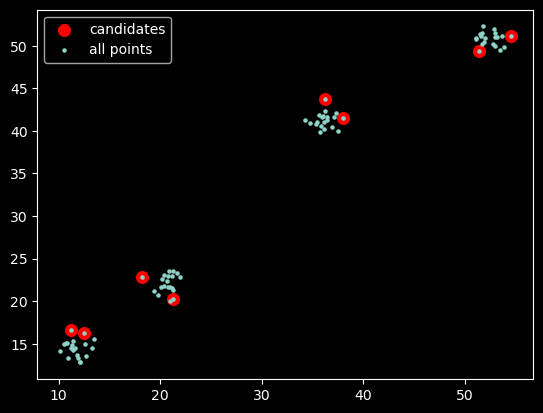

In [248]:
# plot the candidates
plt.scatter(candidates[:, 0], candidates[:, 1], s=70, c='r')
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.legend(['candidates', 'all points'])
plt.show()
